In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("sales_data Python.csv")
print(df.head())

         Date  Store     Category  Units_Sold  Unit_Price
0  2024-01-01    101  Electronics          30      299.99
1  2024-01-01    102     Clothing          45       49.99
2  2024-01-01    103   Home Goods          20       19.99
3  2024-01-02    101  Electronics          25      299.99
4  2024-01-02    102     Clothing          50       49.99


In [6]:
df.duplicated().sum()

np.int64(55)

In [7]:
df_clean = df.drop_duplicates()

In [8]:
df_clean.shape

(55, 5)

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        55 non-null     object 
 1   Store       55 non-null     int64  
 2   Category    55 non-null     object 
 3   Units_Sold  55 non-null     int64  
 4   Unit_Price  55 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.6+ KB


In [10]:
df_clean.describe()

,Store,Units_Sold,Unit_Price
count,55.000000,55.000000,55.000000
mean,102.018182,35.309091,121.444545
std,0.827556,13.046743,126.292110
min,101.000000,15.000000,19.990000
25%,101.000000,25.500000,19.990000
50%,102.000000,32.000000,49.990000
75%,103.000000,43.500000,299.990000
max,103.000000,62.000000,299.990000


In [11]:
df_clean.columns.tolist()

['Date', 'Store', 'Category', 'Units_Sold', 'Unit_Price']

In [12]:
df_clean.isnull().sum()

Date          0
Store         0
Category      0
Units_Sold    0
Unit_Price    0
dtype: int64

In [13]:
df_clean.nunique()

Date          19
Store          3
Category       3
Units_Sold    24
Unit_Price     3
dtype: int64

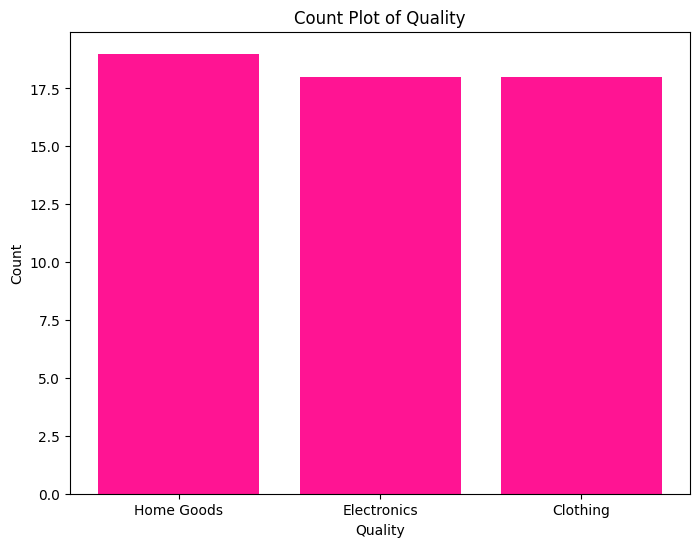

In [14]:
quality_counts = df_clean['Category'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='deeppink')
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

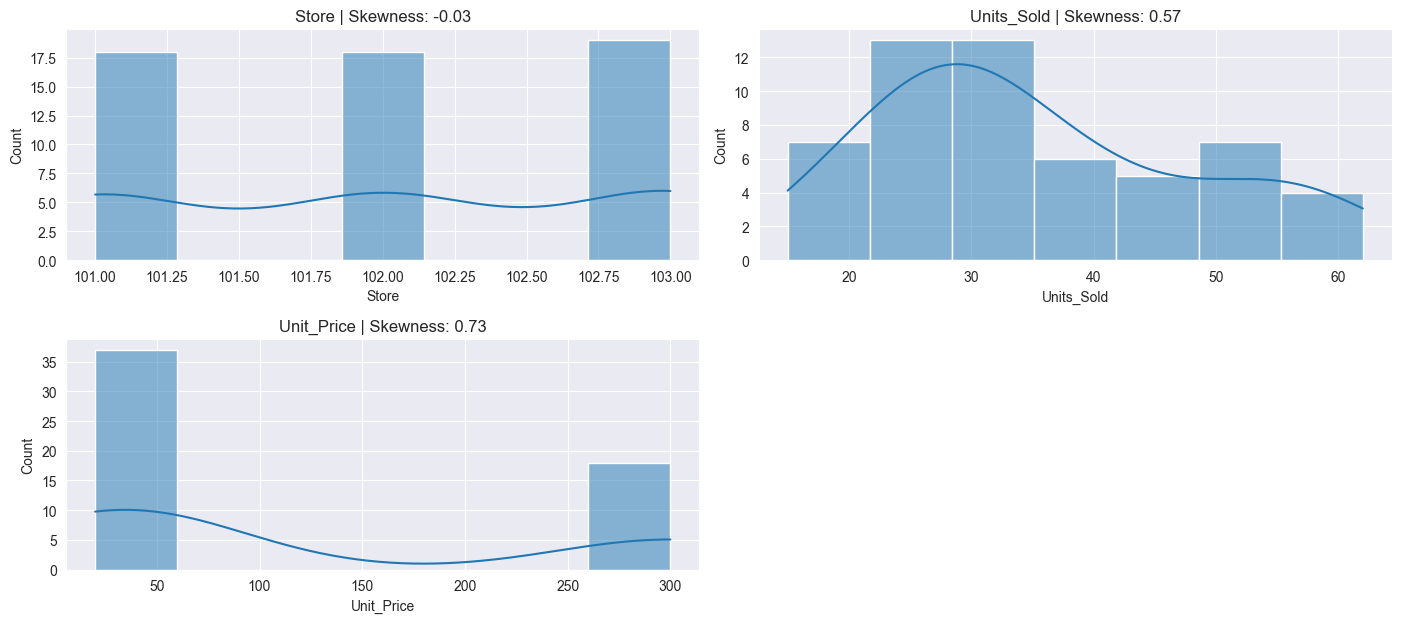

In [16]:
sns.set_style("darkgrid")

numerical_columns = df_clean.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_clean[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_clean[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1640\3830335121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Category", y="Store", data=df_clean, palette='viridis')


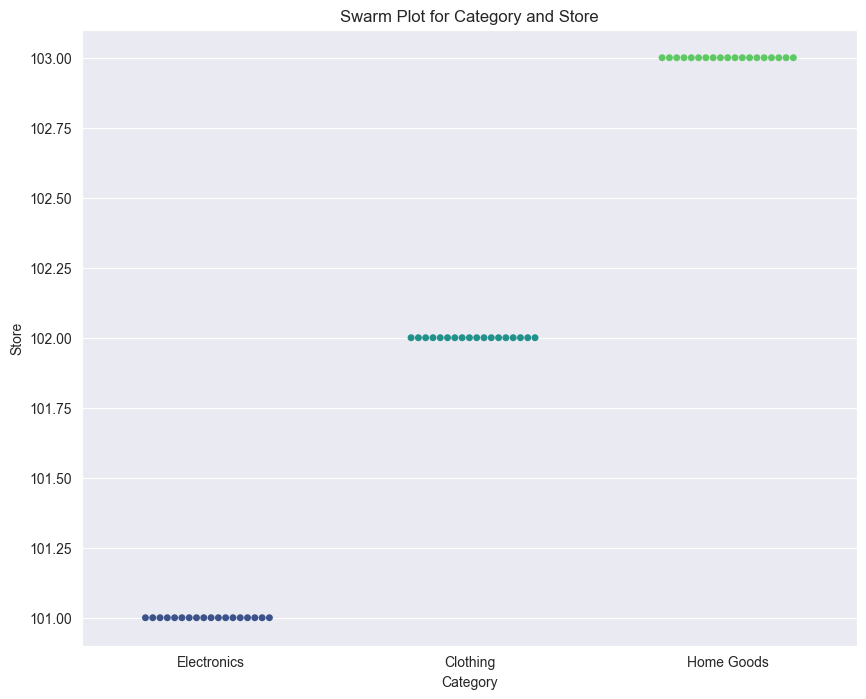

In [17]:
plt.figure(figsize=(10, 8))

sns.swarmplot(x="Category", y="Store", data=df_clean, palette='viridis')

plt.title('Swarm Plot for Category and Store')
plt.xlabel('Category')
plt.ylabel('Store')
plt.show()

<Figure size 1000x600 with 0 Axes>

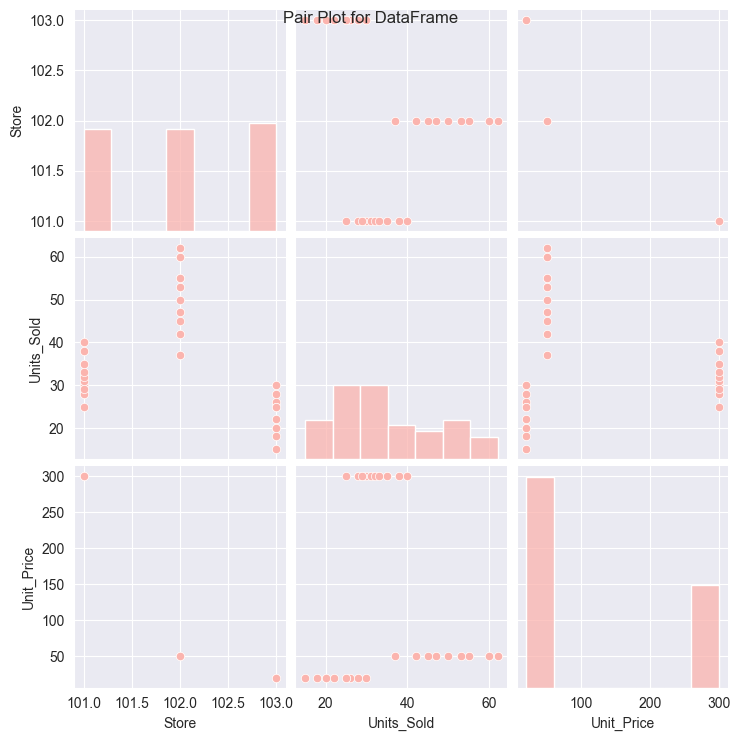

In [18]:
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

sns.pairplot(df_clean)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1640\3093229853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Category'] = df_clean['Category'].astype(str)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1640\3093229853.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Category", y="Units_Sold", data=df_clean, palette= 'viridis', alpha=0.7)


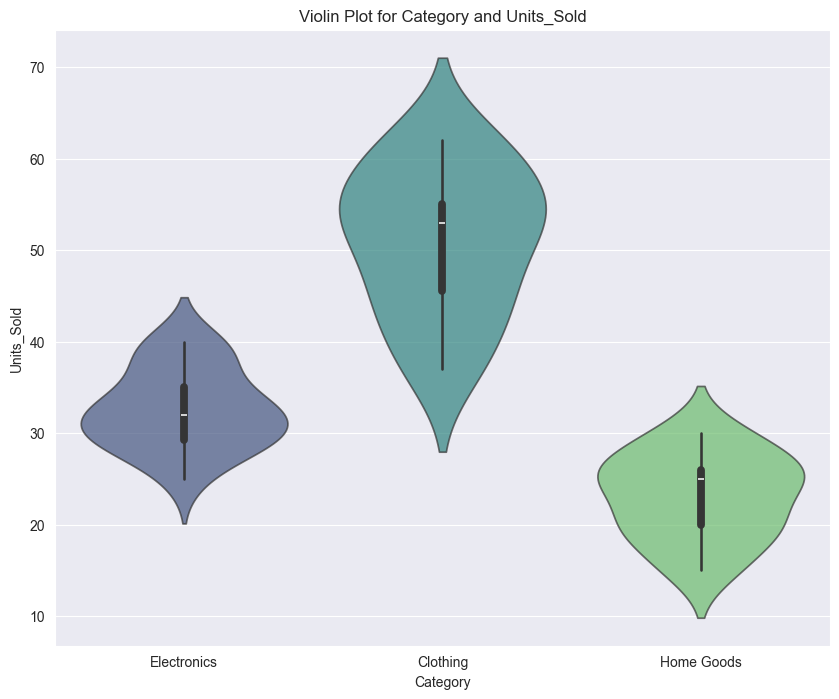

In [22]:
df_clean['Category'] = df_clean['Category'].astype(str)  

plt.figure(figsize=(10, 8))

sns.violinplot(x="Category", y="Units_Sold", data=df_clean, palette= 'viridis', alpha=0.7)

plt.title('Violin Plot for Category and Units_Sold')
plt.xlabel('Category')
plt.ylabel('Units_Sold')
plt.show()


<Axes: xlabel='Category', ylabel='Units_Sold'>

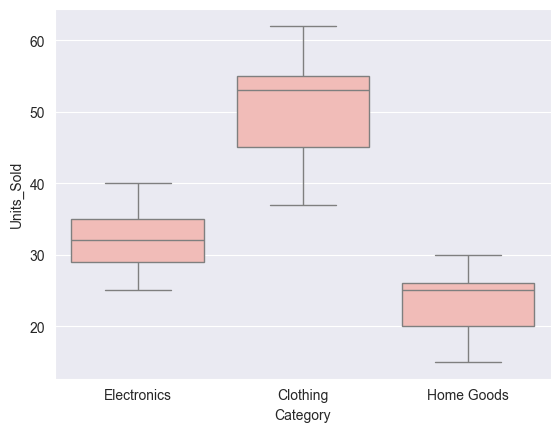

In [23]:
sns.boxplot(x='Category', y='Units_Sold', data=df)

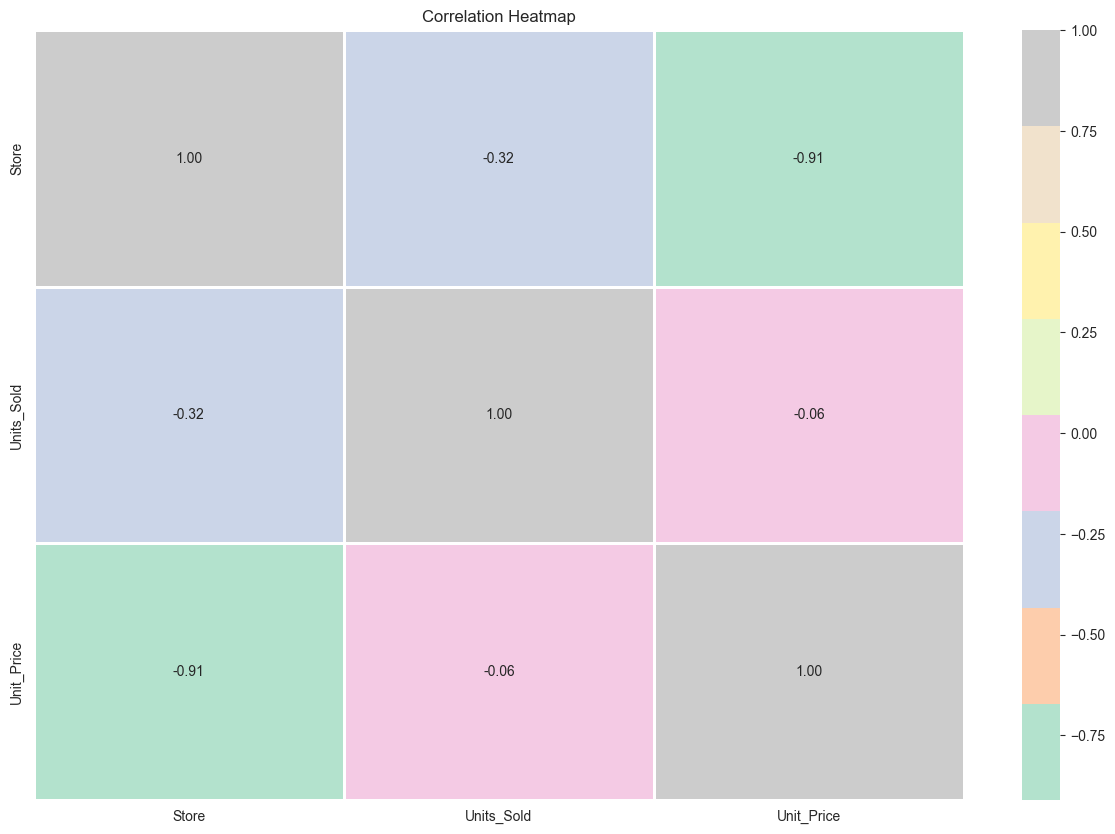

In [30]:
df_numeric = df_clean.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1640\2988043019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])


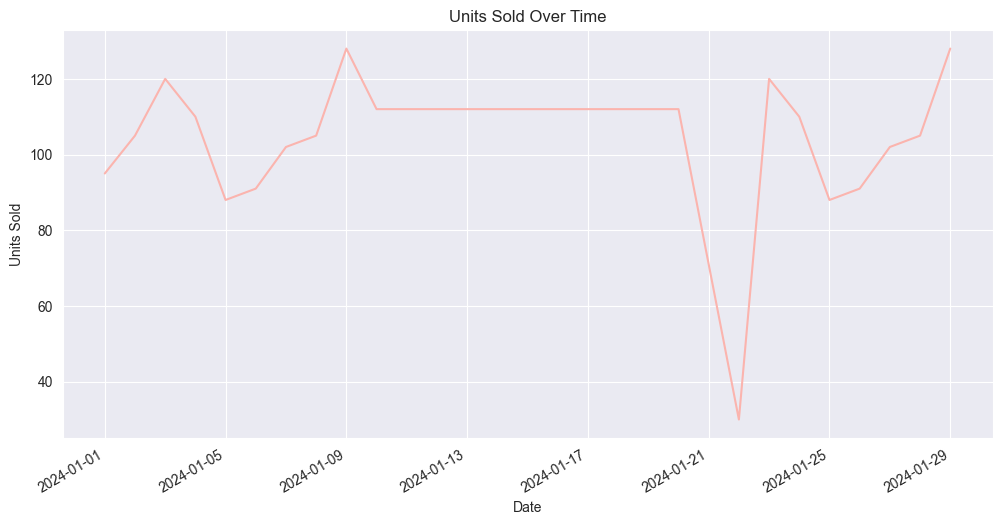

In [32]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean.groupby('Date')['Units_Sold'].sum().plot(figsize = (12,6))
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

In [39]:

df['dia_semana'] = df['Date'].dt.day_name()